# Visualization of CNN Features

### This file is ued to display the CNN feature map of a benign image

In [1]:
import tensorflow as tf
import keras

from keras import regularizers
from keras import backend as K

from keras.models import Sequential, Model

from keras.layers import *
from keras.optimizers import *

from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant


from keras.utils import np_utils
from keras_preprocessing.image import ImageDataGenerator


from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.applications import MobileNetV2

from tensorflow.keras.layers import InputSpec
from keras import activations, initializers, regularizers, constraints

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from PIL import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from keras.applications import MobileNetV2
from keras.layers import LeakyReLU


In [3]:
import scipy.misc
import random
import imageio
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
from keras.applications.inception_v3 import InceptionV3

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [5]:
from keras.models import load_model

model = load_model('keras_model_conv2D_v2.h5')

32
conv2d_4 (3, 3, 3, 32)


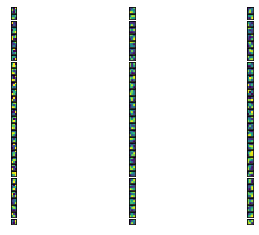

64
conv2d_5 (3, 3, 32, 64)


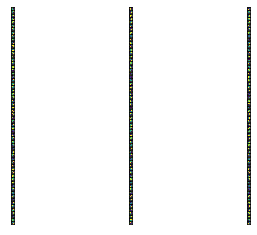

128
conv2d_6 (3, 3, 64, 128)


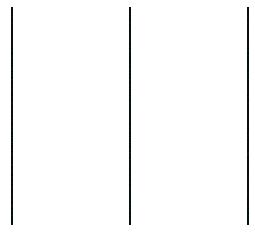

256
conv2d_7 (3, 3, 128, 256)


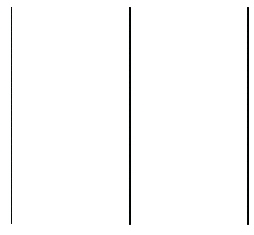

In [7]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
       
        print(layer.name, filters.shape)
        
       
        
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [9]:
img_path ='final/benign/1 (34).jpg'

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
img = load_image(img_path, target_size=(224, 224))
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
x /= 255.0

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
   
    n_features = feature_map.shape[-1] 
    size       = feature_map.shape[ 1] 
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
    
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

NameError: name 'load_image' is not defined